In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:43087 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_cont_param_kpp.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont_kpp','025deg_jra55_ryf_nostress_cont_param_kpp']

In [4]:
hblt_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')
hblt_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')

area_t = cc.querying.getvar(expt=expt[1], variable='area_t', session=session, frequency='static', n=1)

area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_t_NA = (xr.ufuncs.isfinite(hblt_cont)*area_t_NA).mean('time')

area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_t_NP = (xr.ufuncs.isfinite(hblt_cont)*area_t_NP).mean('time')

area_t_SA = area_t.sel(xt_ocean = slice(-70,20)).sel(yt_ocean = slice(-65,-10))
area_t_SA = (xr.ufuncs.isfinite(hblt_cont)*area_t_SA).mean('time')

area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))
area_t_SP = (xr.ufuncs.isfinite(hblt_cont)*area_t_SP).mean('time')

## KPP Mixing Layer

In [5]:
hblt_cont_NA = (hblt_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NA = (hblt_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_NP = (hblt_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NP = (hblt_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SA = (hblt_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SA = (hblt_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SP = (hblt_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SP = (hblt_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'KPP mixing layer - SP')

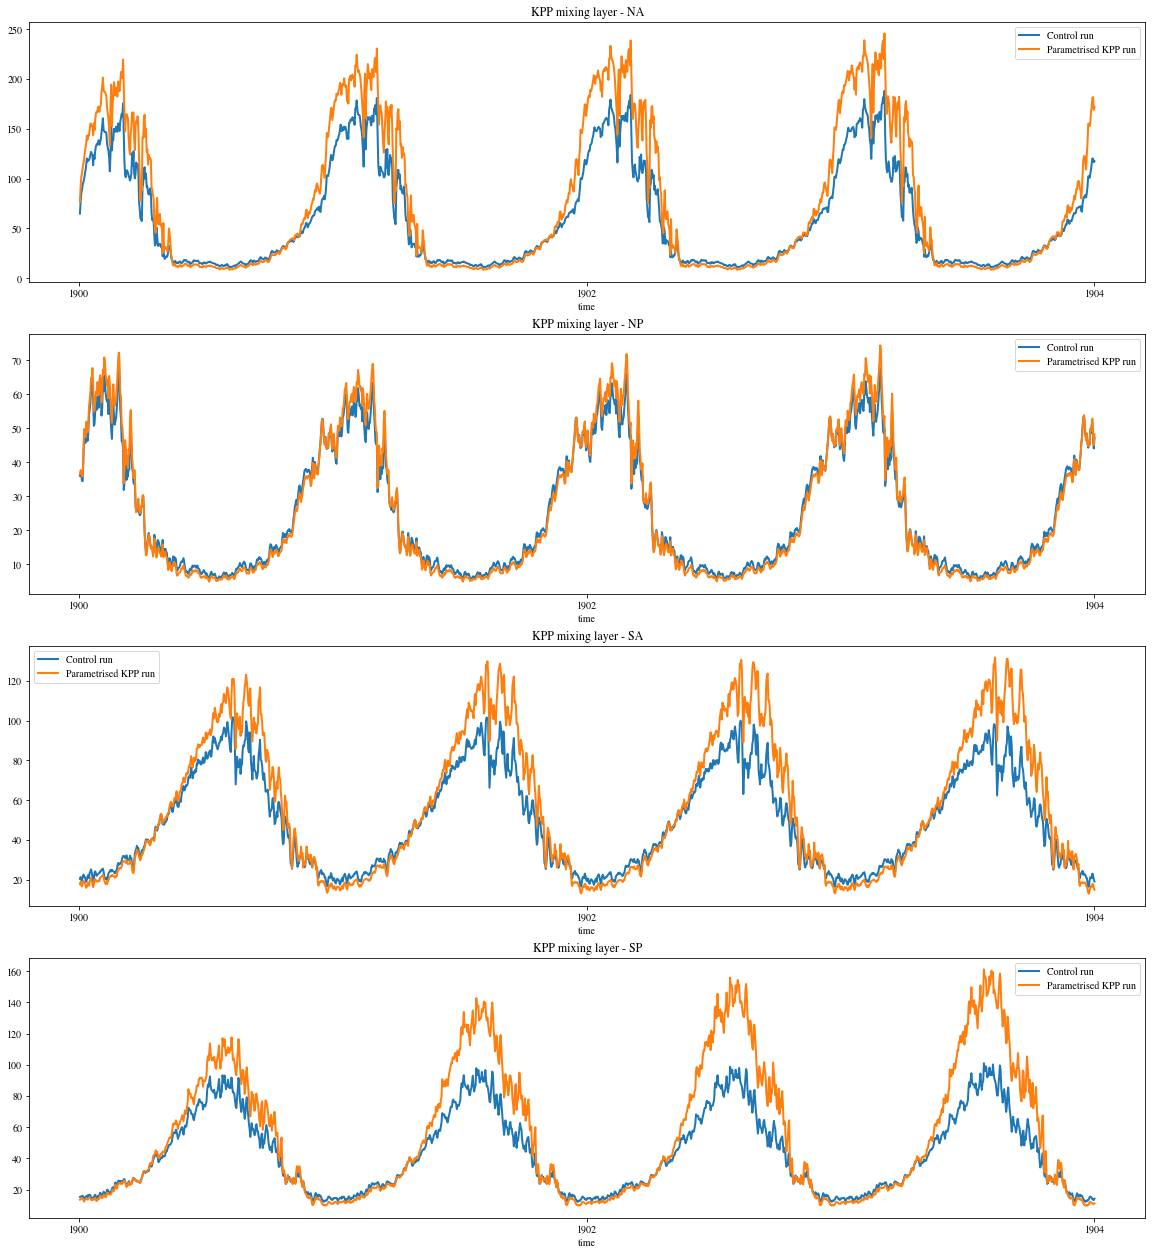

In [26]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

hblt_cont_NA.plot(ax = axes[0],label = 'Control run')
hblt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run')
axes[0].legend()
axes[0].set_title('KPP mixing layer - NA')

hblt_cont_NP.plot(ax = axes[1],label = 'Control run')
hblt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run')
axes[1].legend()
axes[1].set_title('KPP mixing layer - NP')

hblt_cont_SA.plot(ax = axes[2],label = 'Control run')
hblt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run')
axes[2].legend()
axes[2].set_title('KPP mixing layer - SA')

hblt_cont_SP.plot(ax = axes[3],label = 'Control run')
hblt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run')
axes[3].legend()
axes[3].set_title('KPP mixing layer - SP')

The results for KPP mixing layer are much better than before, and maybe it's too early to comment, but it looks like there are issues with this formulation. To reiterate, this formulation used here is:

$$ \text{dVsq} ( (\textbf{u}(z)  - \textbf{u}(z = 0)^2 ) = (80 u_*^2 + u_* ) e^{-\frac{10^{-4} z}{u_*^{0.5}}} $$

## Surface temperature

In [13]:
temp_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 daily')

In [14]:
temp_cont_NA = (temp_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NA = (temp_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_NP = (temp_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NP = (temp_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SA = (temp_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SA = (temp_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SP = (temp_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SP = (temp_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface temperature - SP')

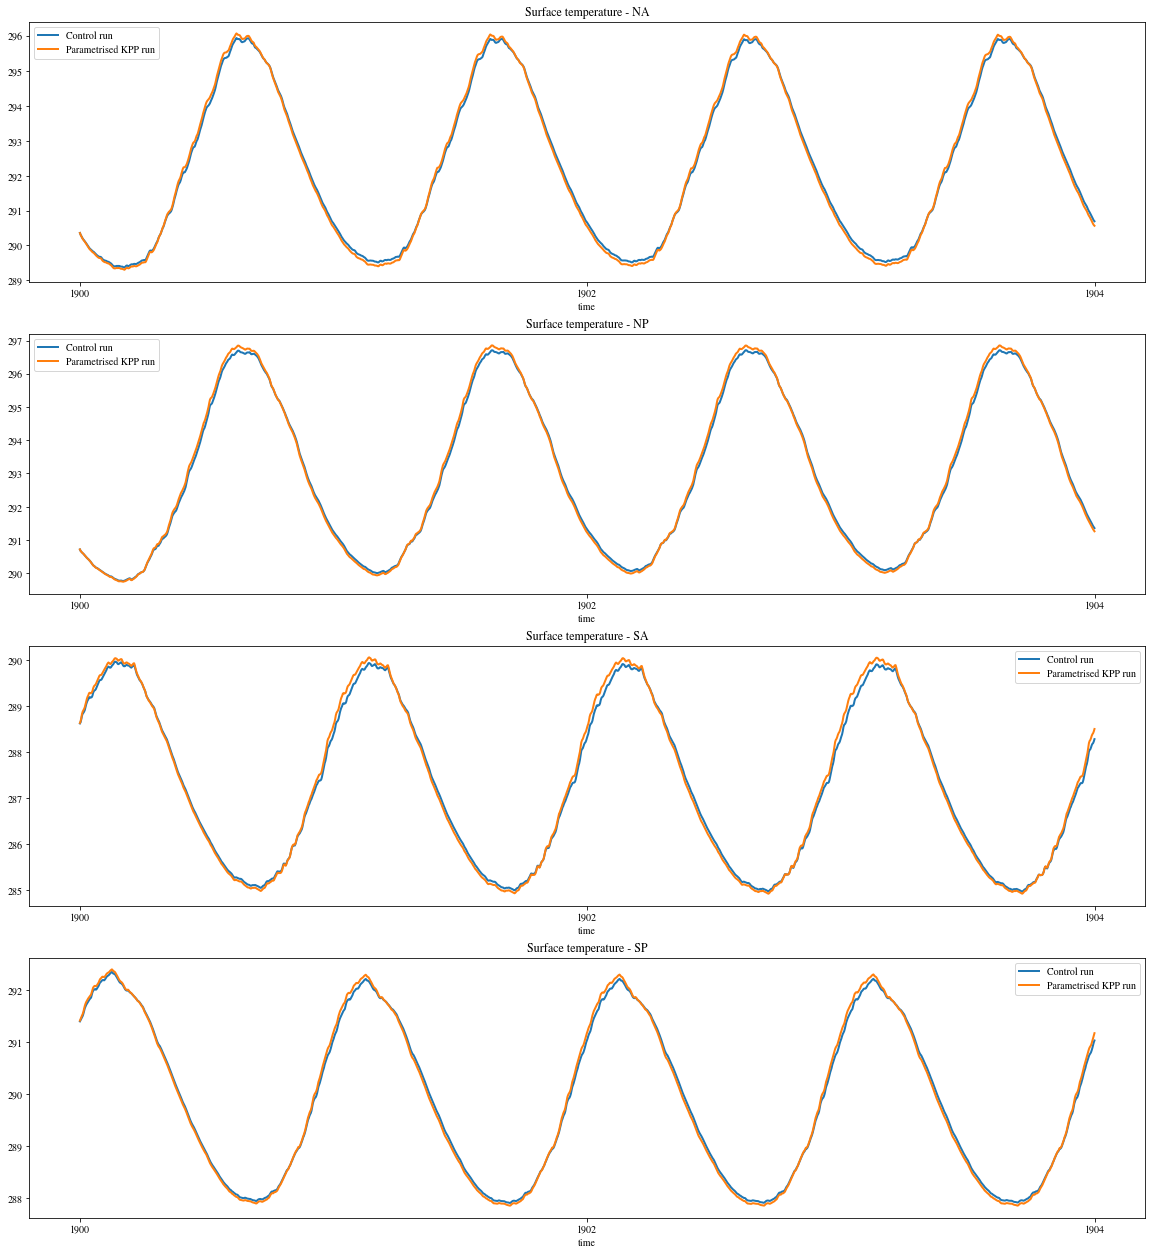

In [16]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

temp_cont_NA.plot(ax = axes[0],label = 'Control run')
temp_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run')
axes[0].legend()
axes[0].set_title('Surface temperature - NA')

temp_cont_NP.plot(ax = axes[1],label = 'Control run')
temp_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run')
axes[1].legend()
axes[1].set_title('Surface temperature - NP')

temp_cont_SA.plot(ax = axes[2],label = 'Control run')
temp_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run')
axes[2].legend()
axes[2].set_title('Surface temperature - SA')

temp_cont_SP.plot(ax = axes[3],label = 'Control run')
temp_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run')
axes[3].legend()
axes[3].set_title('Surface temperature - SP')

## Surface salt

In [17]:
salt_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 daily')

In [18]:
salt_cont_NA = (salt_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NA = (salt_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_NP = (salt_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NP = (salt_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SA = (salt_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SA = (salt_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SP = (salt_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SP = (salt_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface salinity - SP')

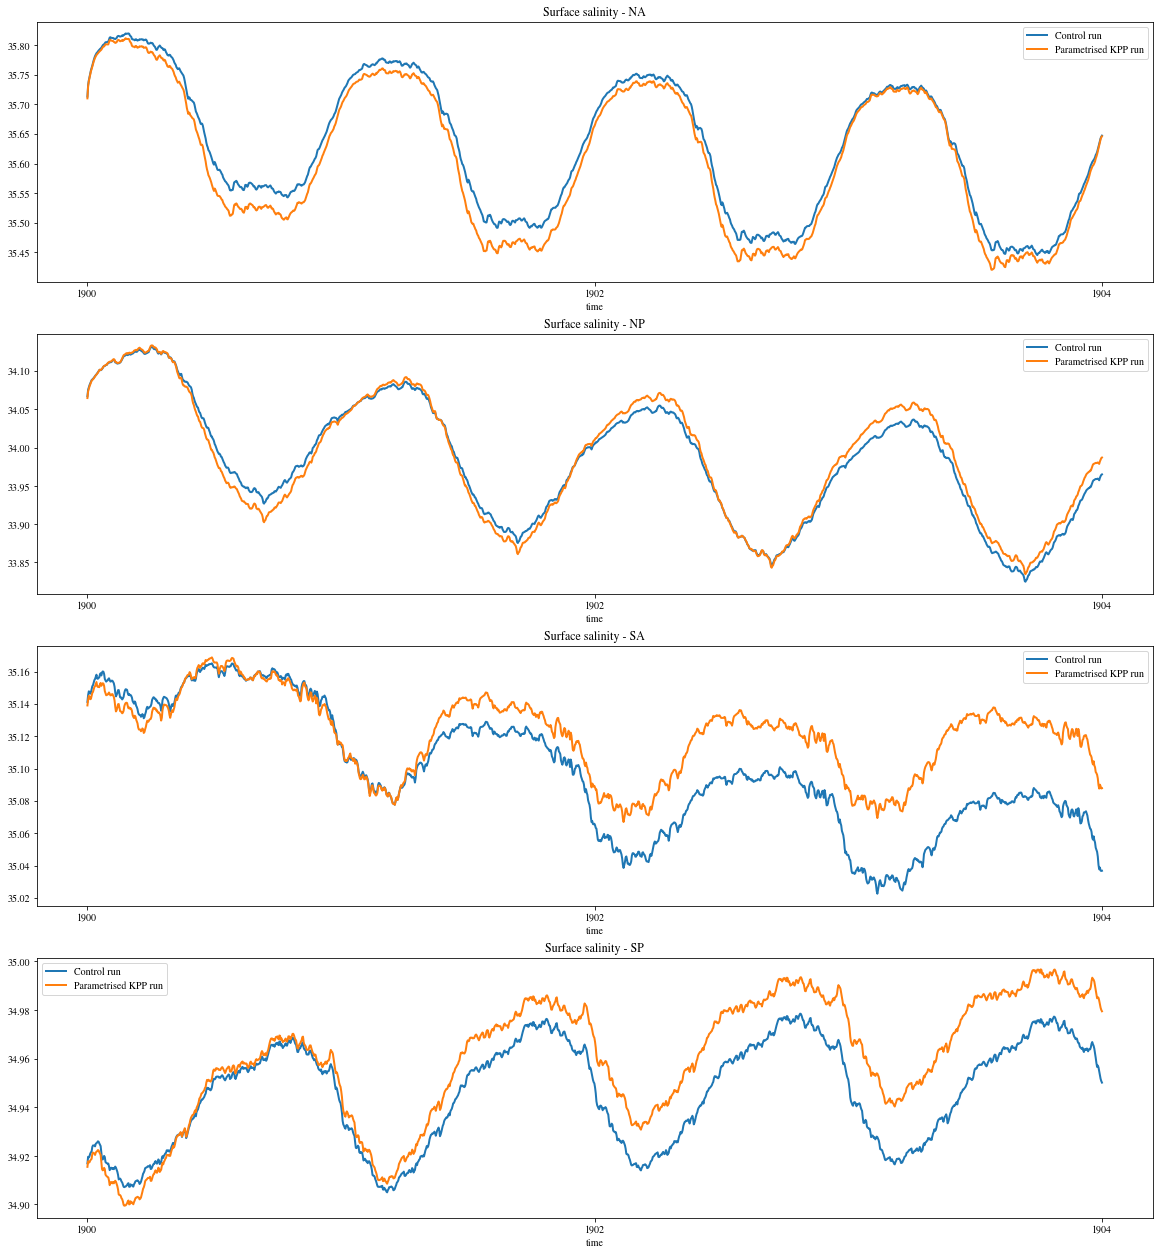

In [19]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

salt_cont_NA.plot(ax = axes[0],label = 'Control run')
salt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run')
axes[0].legend()
axes[0].set_title('Surface salinity - NA')

salt_cont_NP.plot(ax = axes[1],label = 'Control run')
salt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run')
axes[1].legend()
axes[1].set_title('Surface salinity - NP')

salt_cont_SA.plot(ax = axes[2],label = 'Control run')
salt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run')
axes[2].legend()
axes[2].set_title('Surface salinity - SA')

salt_cont_SP.plot(ax = axes[3],label = 'Control run')
salt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run')
axes[3].legend()
axes[3].set_title('Surface salinity - SP')

## Freshwater fluxes

In [20]:
pme_river_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 monthly')

In [21]:
pme_cont_NA = (pme_river_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NA = (pme_river_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_NP = (pme_river_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NP = (pme_river_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SA = (pme_river_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SA = (pme_river_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SP = (pme_river_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SP = (pme_river_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Freshwater input - SP')

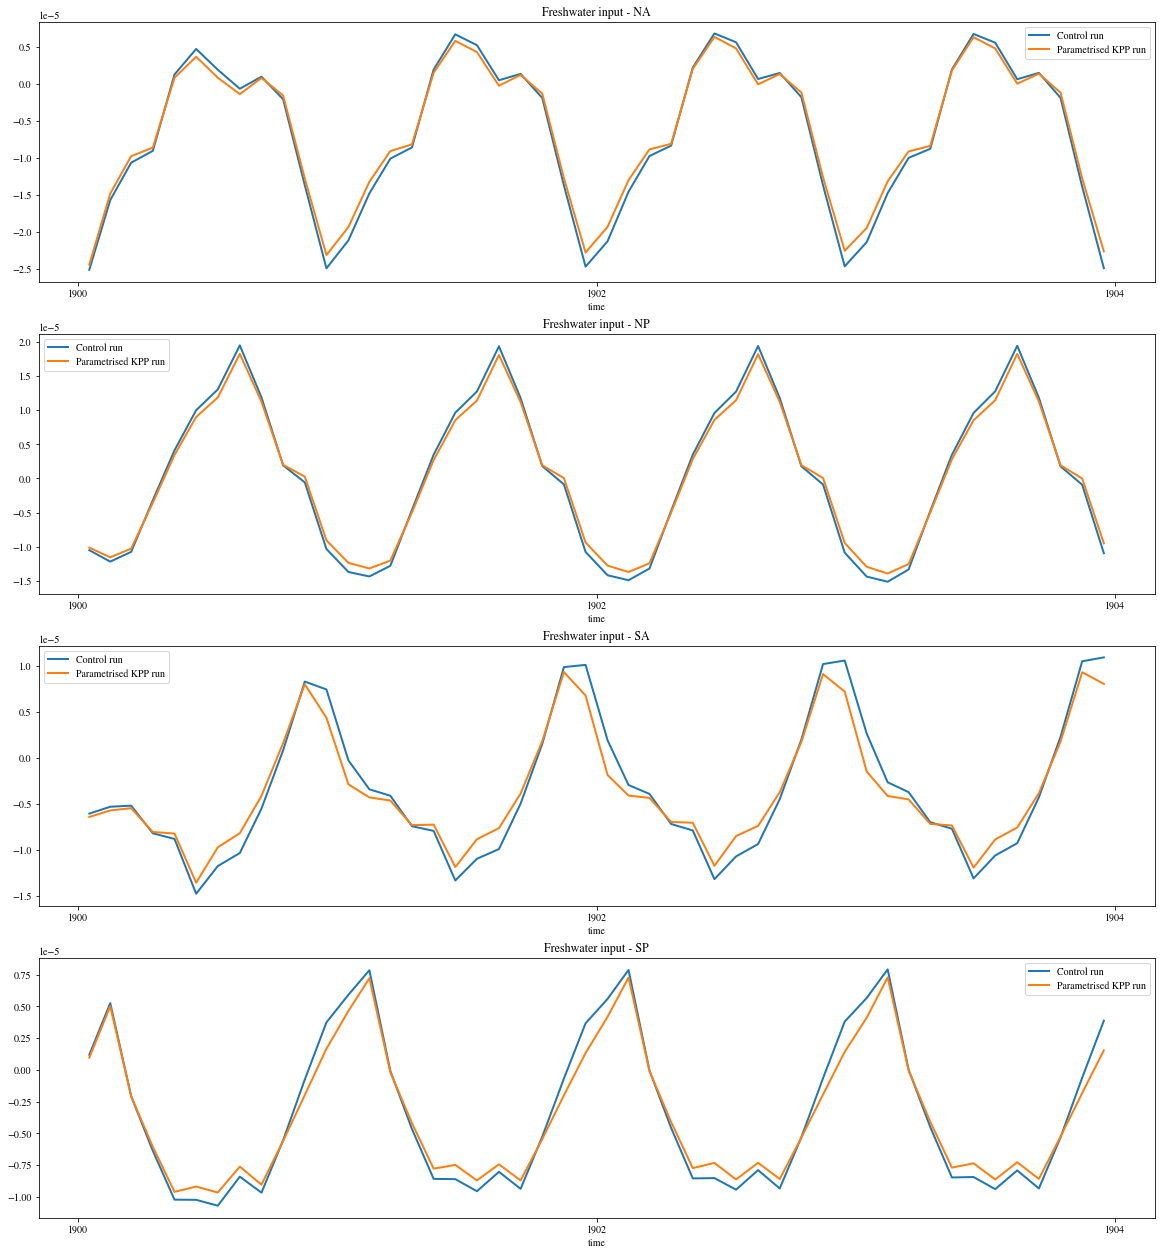

In [22]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

pme_cont_NA.plot(ax = axes[0],label = 'Control run')
pme_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run')
axes[0].legend()
axes[0].set_title('Freshwater input - NA')

pme_cont_NP.plot(ax = axes[1],label = 'Control run')
pme_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run')
axes[1].legend()
axes[1].set_title('Freshwater input - NP')

pme_cont_SA.plot(ax = axes[2],label = 'Control run')
pme_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run')
axes[2].legend()
axes[2].set_title('Freshwater input - SA')

pme_cont_SP.plot(ax = axes[3],label = 'Control run')
pme_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run')
axes[3].legend()
axes[3].set_title('Freshwater input - SP')

## Surface heat flux

In [23]:
heat_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')

In [24]:
heat_cont_NA = (heat_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NA = (heat_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_NP = (heat_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NP = (heat_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SA = (heat_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SA = (heat_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SP = (heat_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SP = (heat_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface heat flux - SP')

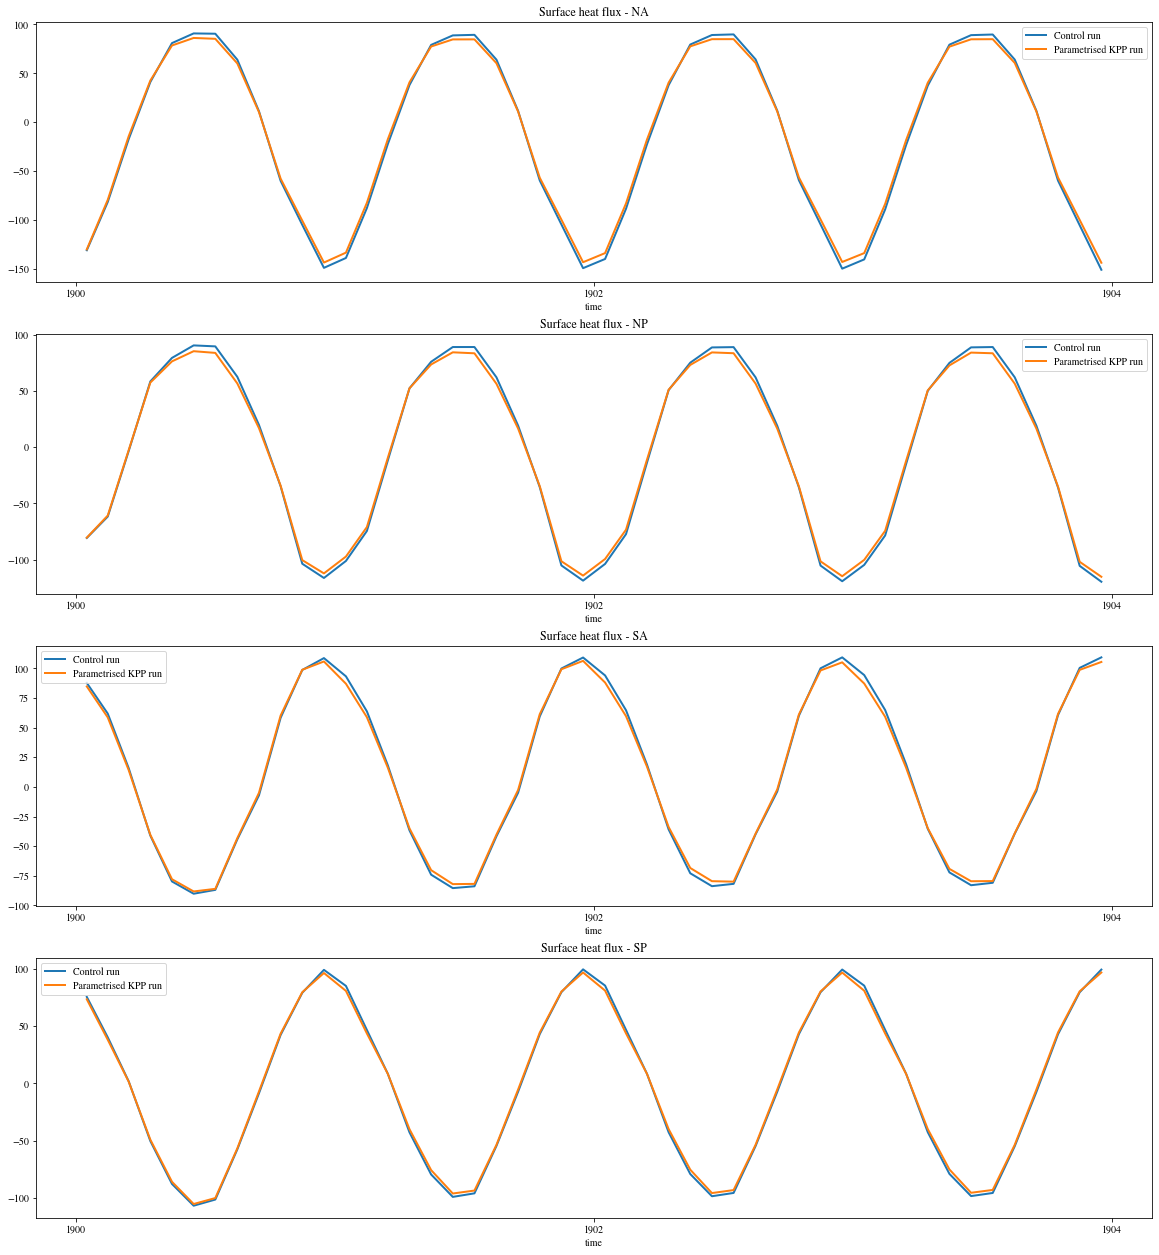

In [25]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

heat_cont_NA.plot(ax = axes[0],label = 'Control run')
heat_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run')
axes[0].legend()
axes[0].set_title('Surface heat flux - NA')

heat_cont_NP.plot(ax = axes[1],label = 'Control run')
heat_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run')
axes[1].legend()
axes[1].set_title('Surface heat flux - NP')

heat_cont_SA.plot(ax = axes[2],label = 'Control run')
heat_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run')
axes[2].legend()
axes[2].set_title('Surface heat flux - SA')

heat_cont_SP.plot(ax = axes[3],label = 'Control run')
heat_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run')
axes[3].legend()
axes[3].set_title('Surface heat flux - SP')

## Gyre Strengths

In [27]:
tx_trans_int_z_cont = cc.querying.getvar(expt[0], 'tx_trans_int_z', session).sel(time = slice('1903-01-01','1903-12-31'))
ty_trans_int_z_cont = cc.querying.getvar(expt[0], 'ty_trans_int_z', session).sel(time = slice('1903-01-01','1903-12-31'))
tx_trans_int_z_pram = cc.querying.getvar(expt[1], 'tx_trans_int_z', session).sel(time = slice('1903-01-01','1903-12-31'))
ty_trans_int_z_pram = cc.querying.getvar(expt[1], 'ty_trans_int_z', session).sel(time = slice('1903-01-01','1903-12-31'))

In [28]:
rho0 = 1025

x_min, x_max = -100, 10
y_min, y_max = 20, 65
ty_cont_NA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NA = ty_cont_NA.cumsum('xt_ocean').where(abs(ty_cont_NA<=1.e20))/(rho0*1.e6)
ty_pram_NA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NA = ty_pram_NA.cumsum('xt_ocean').where(abs(ty_pram_NA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -100
y_min, y_max = 20, 65
ty_cont_NP = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NP = ty_cont_NP.cumsum('xt_ocean').where(abs(ty_cont_NP<=1.e20))/(rho0*1.e6)
ty_pram_NP = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_NP = ty_pram_NP.cumsum('xt_ocean').where(abs(ty_pram_NP<=1.e20))/(rho0*1.e6)

x_min, x_max = -70, 20
y_min, y_max = -65, -20
ty_cont_SA = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SA = ty_cont_SA.cumsum('xt_ocean').where(abs(ty_cont_SA<=1.e20))/(rho0*1.e6)
ty_pram_SA = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_SA = ty_pram_SA.cumsum('xt_ocean').where(abs(ty_pram_SA<=1.e20))/(rho0*1.e6)

x_min, x_max = -250, -80
y_min, y_max = -65, -20
ty_cont_SP = ty_trans_int_z_cont.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SP = ty_cont_SP.cumsum('xt_ocean').where(abs(ty_cont_SP<=1.e20))/(rho0*1.e6)
ty_pram_SP = ty_trans_int_z_pram.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_pram_SP = ty_pram_SP.cumsum('xt_ocean').where(abs(ty_pram_SP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Barotropic Streamfunction (SP) - Parametrised KPP Run')

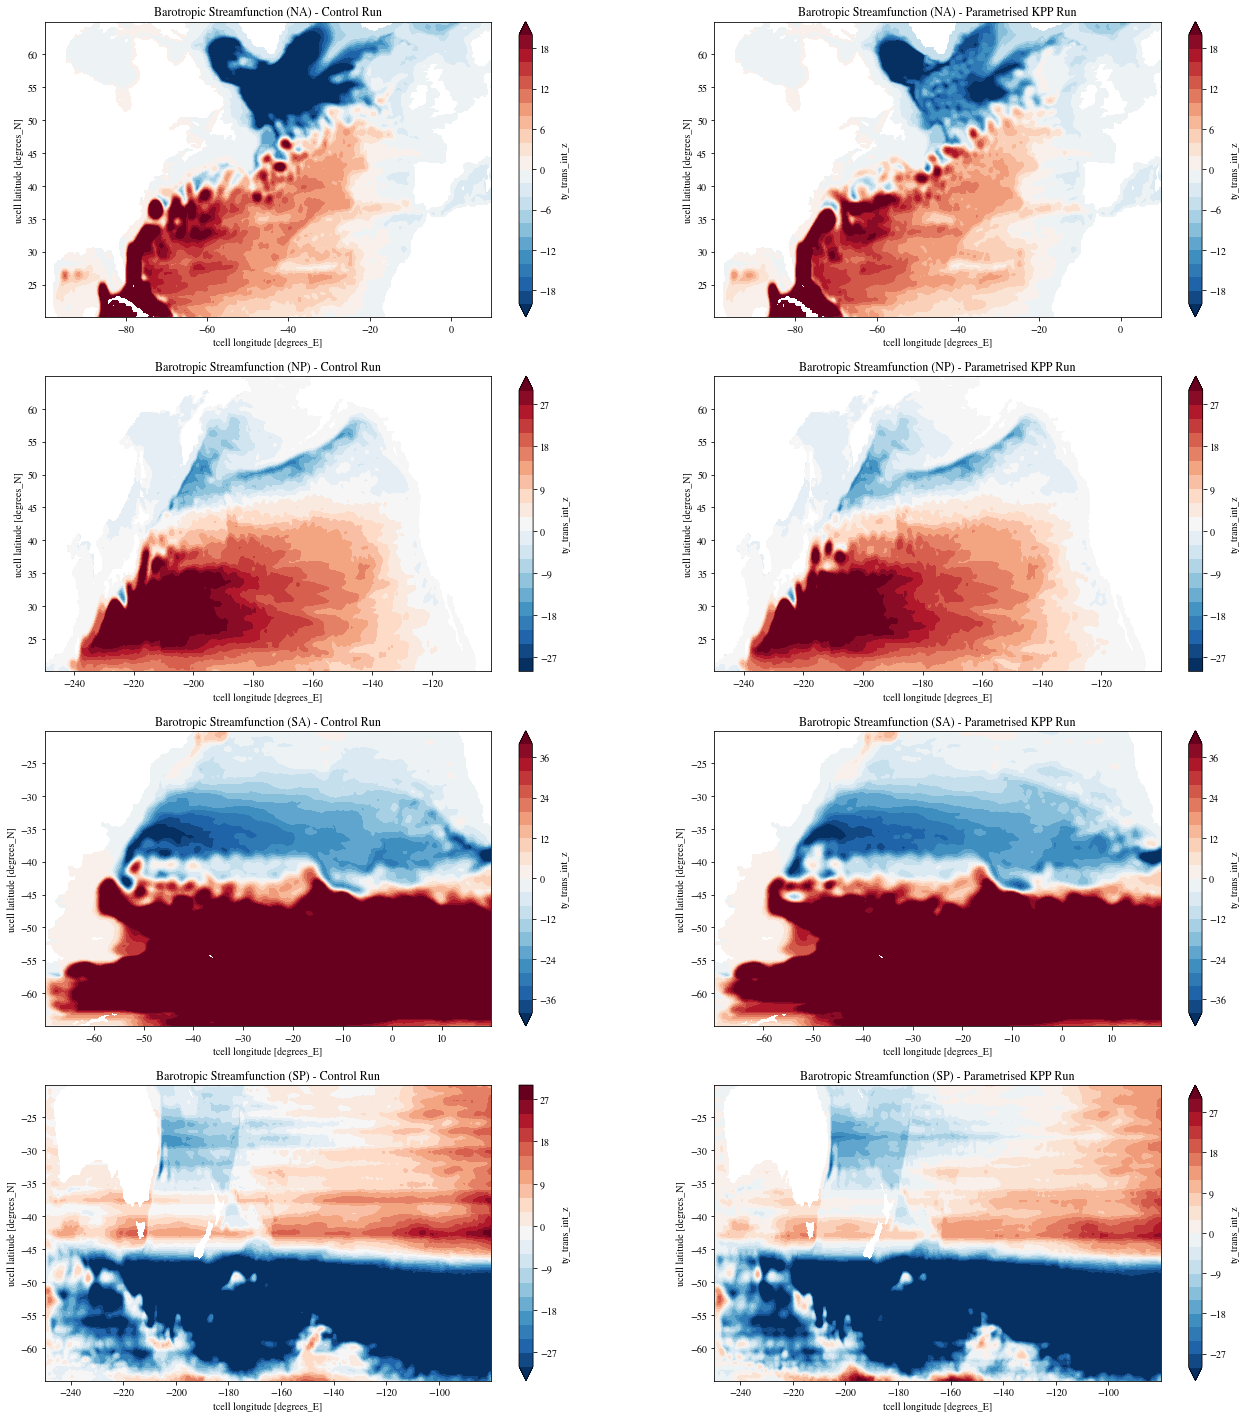

In [32]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (22,25))

psi_cont_NA.mean('time').plot.contourf(ax = axes[0][0], levels = np.linspace(-20,20,21))
axes[0][0].set_title('Barotropic Streamfunction (NA) - Control Run')

psi_pram_NA.mean('time').plot.contourf(ax = axes[0][1], levels = np.linspace(-20,20,21))
axes[0][1].set_title('Barotropic Streamfunction (NA) - Parametrised KPP Run')

psi_cont_NP.mean('time').plot.contourf(ax = axes[1][0], levels = np.linspace(-30,30,21))
axes[1][0].set_title('Barotropic Streamfunction (NP) - Control Run')

psi_pram_NP.mean('time').plot.contourf(ax = axes[1][1], levels = np.linspace(-30,30,21))
axes[1][1].set_title('Barotropic Streamfunction (NP) - Parametrised KPP Run')

psi_cont_SA.mean('time').plot.contourf(ax = axes[2][0], levels = np.linspace(-40,40,21))
axes[2][0].set_title('Barotropic Streamfunction (SA) - Control Run')

psi_pram_SA.mean('time').plot.contourf(ax = axes[2][1], levels = np.linspace(-40,40,21))
axes[2][1].set_title('Barotropic Streamfunction (SA) - Parametrised KPP Run')

psi_cont_SP.mean('time').plot.contourf(ax = axes[3][0], levels = np.linspace(-30,30,21))
axes[3][0].set_title('Barotropic Streamfunction (SP) - Control Run')

psi_pram_SP.mean('time').plot.contourf(ax = axes[3][1], levels = np.linspace(-30,30,21))
axes[3][1].set_title('Barotropic Streamfunction (SP) - Parametrised KPP Run')

Text(0.5, 1.0, 'Control - Parametrised streamfunction - SP')

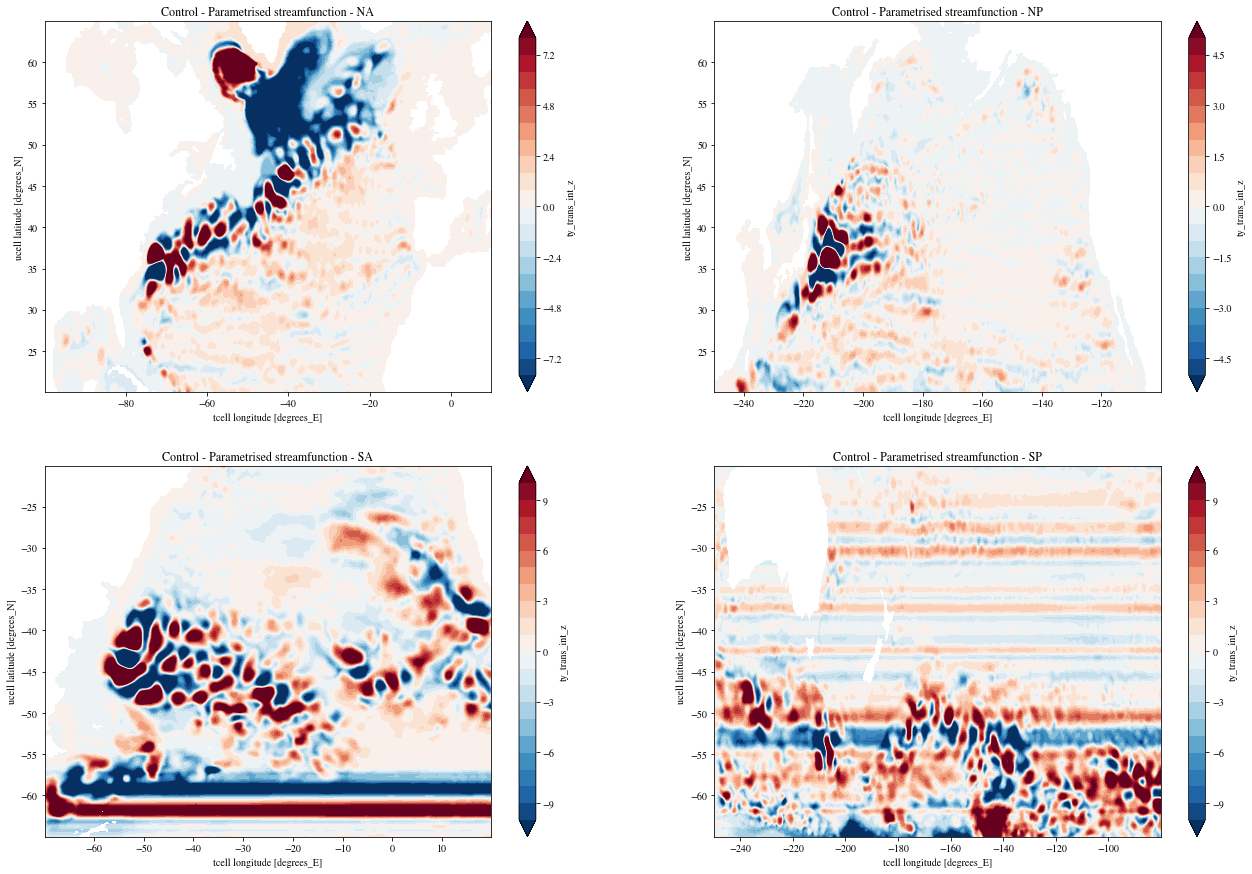

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,15))

(psi_cont_NA - psi_pram_NA).mean('time').plot.contourf(ax = axes[0][0], levels = np.linspace(-8,8,21))
axes[0][0].set_title('Control - Parametrised streamfunction - NA')

(psi_cont_NP - psi_pram_NP).mean('time').plot.contourf(ax = axes[0][1], levels = np.linspace(-5,5,21))
axes[0][1].set_title('Control - Parametrised streamfunction - NP')

(psi_cont_SA - psi_pram_SA).mean('time').plot.contourf(ax = axes[1][0], levels = np.linspace(-10,10,21))
axes[1][0].set_title('Control - Parametrised streamfunction - SA')

(psi_cont_SP - psi_pram_SP).mean('time').plot.contourf(ax = axes[1][1], levels = np.linspace(-10,10,21))
axes[1][1].set_title('Control - Parametrised streamfunction - SP')

Some remarks:
* The KPP mixing layer is more shallower in summer and more deeper in winter regions. These differences grow gradually with time. This could be because the resolved velocity shear is being overestimated in winter and underestimated in summer. The reason for this "miscalculation" is due to the fact that the weightage factor of $u_*^2$ is much more and that of $u_*$ is less than what it should be.
* Surface temperature doesn't change much in the 4 years, and is much more stable to the parametrised KPP. The same can't be said for surface salinity. We encountered something similar in th no-stress run as well, where the surface salintiy would drop down by multiple units almost everywhere. In 4 years time, the salinity differences have reached about 0.05 psu. 
* Freshwater fluxes and surface heat fluxes don't change much for the two cases, and there is not much to comment on these diagnostics.
* There are strong changes in the western boundary currents in the North Atlantic and North Pacific, namely the Gulf Stream and the Kuroshio current. However, the gyres retain a lot of structure after 4 years, which is a good sign, because the no-stress runs had major changes in the gyre circulations in the first year itself.
* The Pacific regions are better than the Atlantic regions in terms of the gyre strength - with the latter experiencing huge deviations by the end of 4th year.